# 2. Practical Part

## 1. Ridge Regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt


class gradDescent():
    def __init__(self, weightedDecay = 0.01, stepSize = 0.01, numberSteps = 400):
        self.weightedDecay = weightedDecay
        self.stepSize = stepSize
        self.numberSteps = numberSteps

    def regression_gradient(self, weight, bias, data, target):
        '''
        bias: 1d scalar
        weightedDecay: λ
        stepSize: η
        x: data
        t: target
        
        '''
        for i in range(0, self.numberSteps):
            #gradient of one data, randomly chosen
                index = np.random.randint(0, data.shape[0])
            
                grad =2*(weight * data[index]  + bias-target[index]) * data[index]
                #regularization lambda
                regGrad = 2 * self.weightedDecay * weight
                regGrad = regGrad + grad
                
                weight = weight - self.stepSize*regGrad
                
                biasGrad = - 2*(weight * data[index]  + bias-target[index])
                bias = bias - self.stepSize*biasGrad
        return weight, bias


     

## 2. Draw Dn from h(x)

In [8]:
def hX(x):
    '''
    defines the target function
    '''
    return np.sin(x) + 0.3*x -1

##  3. Train without regularization, $\lambda$ = 0
Plot h(x), Dn, and our prediction function $f(X) = w^T X + b $

## 4. Part 3 revisited, with difference lamda values
Plot prediction with $W$ regularized by $\lambda$ $\lVert w \rVert^2$
Choose $\lambda$ intermediate and large

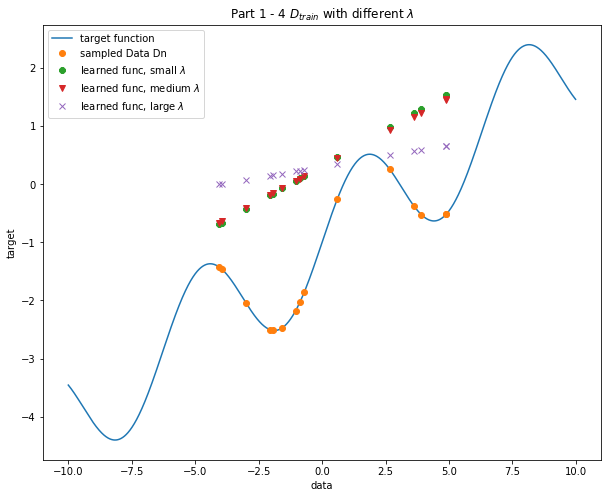

In [9]:
data = np.random.uniform(-5,5,15)
target = hX(data)
dataDn = [data, target]

#initialize weights
#weight = np.random.rand(15)
weight = np.random.rand(1)
bias = 0

#param holders
regGDsmallParam = []
regGDMedParam = []
regGDLargeParam = []

#Small lambda
# reinit the params
weight = np.random.rand(1)
bias = 0
regGDsmall = gradDescent(weightedDecay = 0.01, stepSize = 0.00025)
regGDsmallParam = regGDsmall.regression_gradient(weight, bias, dataDn[0], dataDn[1])

weight = np.random.rand(1)
bias = 0
regGDMed = gradDescent(weightedDecay = 1, stepSize = 0.00025)
regGDMedParam = regGDMed.regression_gradient(weight, bias, dataDn[0], dataDn[1])

weight = np.random.rand(1)
bias = 0
regGDLarge = gradDescent(weightedDecay = 20, stepSize = 0.00025)
regGDLargeParam = regGDLarge.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# learned functions
learnedFuncSmall = (regGDsmallParam[0] * dataDn[0]) + regGDsmallParam[1]
learnedFuncMed = (regGDMedParam[0] * dataDn[0]) + regGDMedParam[1]
learnedFuncLarge = (regGDLargeParam[0] * dataDn[0]) + regGDLargeParam[1]
#plot data function
xvals = np.arange(-10, 10, 0.01)
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(xvals, hX(xvals), label = "target function")
plt.plot(dataDn[0], target, 'o', label="sampled Data Dn")
plt.plot(dataDn[0], learnedFuncSmall, '8', label = "learned func, small $\lambda$")
plt.plot(dataDn[0], learnedFuncMed, 'v', label = "learned func, medium $\lambda$")
plt.plot(dataDn[0], learnedFuncLarge, 'x', label = "learned func, large $\lambda$")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 1 - 4 $D_{train}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()


## 5. Sample $D_{test}$ from $h(X)$
Use $\lambda$ = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

Plot $\lambda$  on x-axis, avg((f(X) - target)^2)

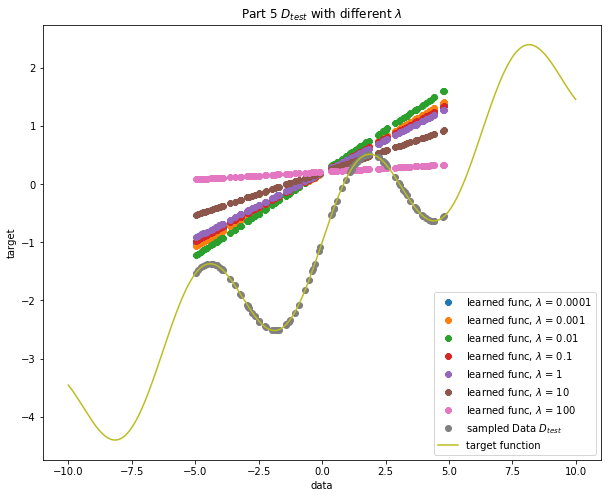

[1.7013580287478083, 1.6815770727878856, 1.7408354237736738, 1.7107366824742616, 1.7189946307771349, 1.8404167867824188, 2.2217620515841703]


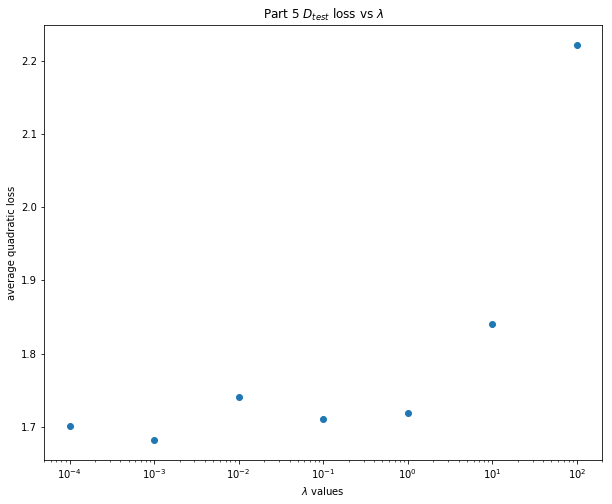

In [10]:
#sample D_test
data = np.random.uniform(-5,5,100)
target = hX(data)
dataDtest = [data, target]

lambdaVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
weight = np.random.rand(1)
bias = 0

lossArr = []

for i in lambdaVals:
    regGD = gradDescent(weightedDecay = i, stepSize = 0.00025)
    regGDParam = regGD.regression_gradient(weight, bias, dataDtest[0], dataDtest[1])
    
    xvals = np.arange(-10, 10, 0.01)
    plt.rcParams['figure.figsize'] = [10, 8]
    learnedFunc = (regGDParam[0] * dataDtest[0]) + regGDParam[1]
    
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr.append(loss)
    plt.plot(dataDtest[0], learnedFunc, '8', label = "learned func, $\lambda$ = {}".format(i) )    

plt.plot(dataDtest[0], dataDtest[1], 'o', label="sampled Data $D_{test}$")
plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 5 $D_{test}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()

print(lossArr)

plt.plot(np.array(lambdaVals),np.array(lossArr), 'o')
plt.xlabel("$\lambda$ values")
plt.xticks(range(len(lambdaVals)), np.array(lambdaVals))
plt.xscale('log')
plt.ylabel("average quadratic loss")
plt.title("Part 5 $D_{test}$ loss vs $\lambda$")
plt.show()

## 6. Use kernel $\phi(x)$
set $\lambda = 0.01$

Try different degrees of polynomials


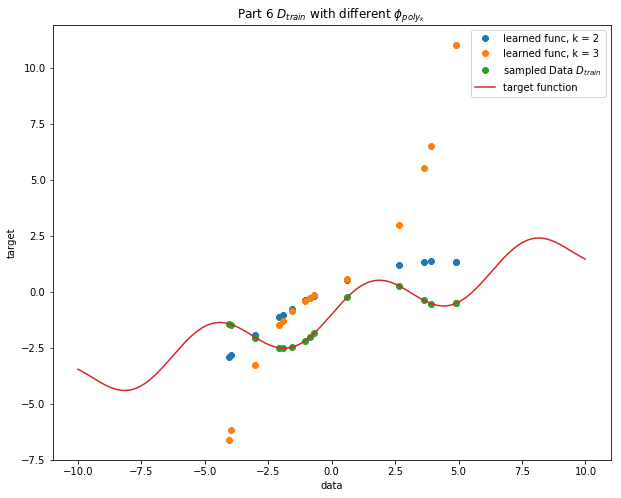

In [12]:
kDegreeArr = [2, 3]
weight = np.random.rand(1)
bias = 0

plt.rcParams['figure.figsize'] = [10, 8]

for k in kDegreeArr:
    # Not this simple: we aren't just raising everything in x to degree k,
    # but changing the dimension of x altogether, [x] -> [x, ..., x^k].
    #dataK = np.power(dataDn[0], k)
    
    # Do the mapping
    
    #print('data:', dataDn[0])
    to_map = [dataDn[0]]
    #print("kDegreeArr[j] before", k)
    for i in range(2, k+1): # kDegreeArr[j]+1):
        raised = np.power(dataDn[0], k)
        to_map.append(raised)
    #print("kDegreeArr[j] after", k)
    dataK = np.column_stack(to_map)
    #print('dataK:', dataK)
    dataKn = [dataK, dataDn[1]] #same target
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Plot
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    #print('learnedFunc:', learnedFunc)
    #print('learnedFunc:', np.sum(learnedFunc, axis = 1))
    
    learnedFunc = np.sum(learnedFunc, axis = 1)

    plt.plot(dataDn[0], learnedFunc, '8', label = "learned func, k = {}".format(k)) 
    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'o', label="sampled Data $D_{train}$")
plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()

## 7. Comment on $l$, empirical risk ($D_n$), true risk($D_{test}$)